In [25]:
from pandas import read_csv, DataFrame
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import numpy as np


from base.pandas_constants import AlgorithmConstants, DataFrameConstants


In [26]:
df = read_csv(AlgorithmConstants.LANDSLIDE_FINAL_DF_PATH)
df.head()

df = df[df[DataFrameConstants.DANGER_LEVEL] != 'Baixa']

In [27]:
df.describe()


,processo_numero,latitude,longitude,rain_day,rain_hour,elevation
count,1.927000e+03,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000
mean,8.049312e+09,-8.034787,-34.930820,15.314634,0.658018,47.235599
std,1.863672e+07,0.052360,0.017891,19.046952,1.286009,16.238344
min,8.000042e+09,-8.140337,-34.979501,0.000000,0.000000,7.000000
25%,8.034528e+09,-8.086452,-34.945819,3.650000,0.100000,35.000000
50%,8.053231e+09,-8.009220,-34.929010,9.600000,0.200000,47.000000
75%,8.061411e+09,-8.000093,-34.917472,19.100000,0.600000,60.000000
max,8.113660e+09,-7.961544,-34.886717,83.000000,8.300000,90.000000


In [28]:
label_encoders = {}
categorical_columns = [
    DataFrameConstants.GROUND_TYPE,
    DataFrameConstants.GROUND_AMPLITUDE,
    DataFrameConstants.SLOPE_DEGREE,
    DataFrameConstants.SLOPE_PERCENTAGE,
    DataFrameConstants.DANGER_LEVEL
]

numerical_columns = [
    DataFrameConstants.RAIN_DAY,
    DataFrameConstants.RAIN_HOUR,
    DataFrameConstants.ELEVATION,
    DataFrameConstants.LATITUDE,
    DataFrameConstants.LONGITUDE
]

df_encoded = df.copy()

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

df_encoded = df_encoded[numerical_columns + categorical_columns]
df_encoded.describe()

,rain_day,rain_hour,elevation,latitude,longitude,ground_type,ground_amplitude,slope_degree,slope_percentage,danger_level
count,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000
mean,15.314634,0.658018,47.235599,-8.034787,-34.930820,2.319668,1.970420,0.981318,1.970420,0.901401
std,19.046952,1.286009,16.238344,0.052360,0.017891,1.480066,0.175489,0.195122,0.175489,0.298200
min,0.000000,0.000000,7.000000,-8.140337,-34.979501,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.650000,0.100000,35.000000,-8.086452,-34.945819,2.000000,2.000000,1.000000,2.000000,1.000000
50%,9.600000,0.200000,47.000000,-8.009220,-34.929010,3.000000,2.000000,1.000000,2.000000,1.000000
75%,19.100000,0.600000,60.000000,-8.000093,-34.917472,3.000000,2.000000,1.000000,2.000000,1.000000
max,83.000000,8.300000,90.000000,-7.961544,-34.886717,5.000000,2.000000,2.000000,2.000000,1.000000


In [29]:
scaler = StandardScaler()


df_to_be_scaled = df_encoded
df_scaled = scaler.fit_transform(df_to_be_scaled)

DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03,1.927000e+03
mean,1.474920e-17,-1.474920e-17,-1.843650e-18,-3.731548e-15,5.092014e-13,1.327428e-16,-1.253682e-16,-3.097332e-16,-1.253682e-16,5.899680e-17
std,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00
min,-8.042552e-01,-5.118072e-01,-2.478457e+00,-2.016389e+00,-2.721776e+00,-1.567680e+00,-1.123107e+01,-5.030572e+00,-1.123107e+01,-3.023591e+00
25%,-6.125737e-01,-4.340270e-01,-7.536960e-01,-9.869897e-01,-8.386258e-01,-2.160383e-01,1.685992e-01,9.576975e-02,1.685992e-01,3.307325e-01
50%,-3.001067e-01,-3.562469e-01,-1.451260e-02,4.884230e-01,1.011687e-01,4.597828e-01,1.685992e-01,9.576975e-02,1.685992e-01,3.307325e-01
75%,1.987903e-01,-4.512622e-02,7.862694e-01,6.627827e-01,7.462511e-01,4.597828e-01,1.685992e-01,9.576975e-02,1.685992e-01,3.307325e-01
max,3.554529e+00,5.943946e+00,2.634228e+00,1.399199e+00,2.465748e+00,1.811425e+00,1.685992e-01,5.222112e+00,1.685992e-01,3.307325e-01


In [30]:
hdb = HDBSCAN()
hdb.fit(df_scaled)
labels = hdb.labels_
probabilities = hdb.probabilities_
print(hdb.probabilities_)

[1.         1.         1.         ... 0.78200847 0.91427321 1.        ]


In [31]:
df[DataFrameConstants.CLUSTER] = labels
df[DataFrameConstants.PROBABILITY] = probabilities
df.describe()


,processo_numero,latitude,longitude,rain_day,rain_hour,elevation,cluster,PROBABILITY
count,1.927000e+03,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000
mean,8.049312e+09,-8.034787,-34.930820,15.314634,0.658018,47.235599,21.237156,0.810899
std,1.863672e+07,0.052360,0.017891,19.046952,1.286009,16.238344,11.386959,0.337560
min,8.000042e+09,-8.140337,-34.979501,0.000000,0.000000,7.000000,-1.000000,0.000000
25%,8.034528e+09,-8.086452,-34.945819,3.650000,0.100000,35.000000,16.000000,0.785452
50%,8.053231e+09,-8.009220,-34.929010,9.600000,0.200000,47.000000,26.000000,1.000000
75%,8.061411e+09,-8.000093,-34.917472,19.100000,0.600000,60.000000,27.000000,1.000000
max,8.113660e+09,-7.961544,-34.886717,83.000000,8.300000,90.000000,43.000000,1.000000


In [32]:
df[DataFrameConstants.CLUSTER].value_counts()

cluster
 27    666
 24    271
-1     237
 26    125
 23     66
 8      60
 39     47
 29     46
 3      27
 5      23
 11     20
 28     20
 38     20
 36     18
 22     18
 43     17
 18     17
 10     15
 4      13
 42     12
 9      11
 35     11
 19     11
 32     11
 7      10
 6      10
 1       9
 16      9
 41      8
 0       8
 15      7
 14      7
 33      7
 34      7
 30      7
 12      7
 2       6
 37      6
 25      6
 21      6
 13      5
 40      5
 17      5
 31      5
 20      5
Name: count, dtype: int64

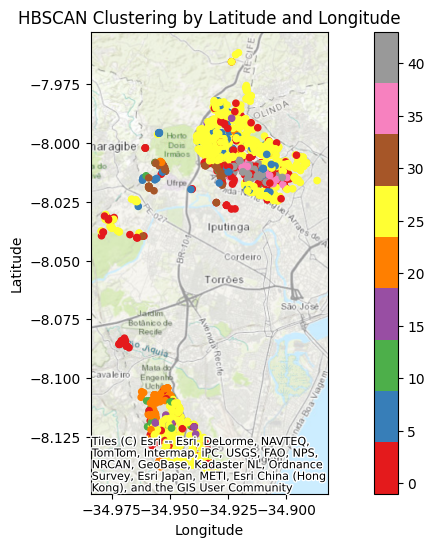

In [33]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df[DataFrameConstants.LONGITUDE], df[DataFrameConstants.LATITUDE])
)

# Set a CRS (Coordinate Reference System) for the GeoDataFrame (e.g., WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Plotting with map background
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the GeoDataFrame on the ax
gdf.plot(ax=ax, column=DataFrameConstants.CLUSTER, cmap='Set1', markersize=20, legend=True)

# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldTopoMap)

# Customize plot appearance
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('HBSCAN Clustering by Latitude and Longitude')

plt.show()


In [34]:
df.to_csv('hbscan.csv', index=False, header=True)


In [35]:
df.groupby(DataFrameConstants.CLUSTER)[DataFrameConstants.PROBABILITY].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
-1,237.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0,8.0,0.922121,0.145542,0.586730,0.917493,1.000000,1.000000,1.0
1,9.0,0.824110,0.224446,0.480289,0.601438,1.000000,1.000000,1.0
2,6.0,0.986411,0.033286,0.918465,1.000000,1.000000,1.000000,1.0
3,27.0,0.577545,0.280865,0.203262,0.366848,0.476746,0.804350,1.0
4,13.0,0.677496,0.313565,0.278476,0.332023,0.573925,1.000000,1.0
5,23.0,0.616043,0.273632,0.298234,0.381160,0.505439,0.878968,1.0
6,10.0,0.945801,0.106398,0.659407,0.964242,0.988507,1.000000,1.0
7,10.0,0.877535,0.218469,0.305095,0.826905,1.000000,1.000000,1.0
